In [206]:
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

plt.rc('font', size=12)
plt.rc('axes', labelsize=12)

In [207]:
import gglngram as gn

In [208]:
import sqlite3 as sq

http://storage.googleapis.com/books/ngrams/books/datasetsv2.html

In [209]:
dbconnection = sq.connect('database.sqlite')
cursor = dbconnection.cursor()

In [210]:
getTopBulk = """ SELECT bulk, sum(match_count) AS total_match
                  FROM ngram GROUP BY bulk
                  ORDER BY total_match DESC 
                  LIMIT 20 """

getTopNgram = """ SELECT ngram, sum(match_count) AS total_match
                  FROM ngram GROUP BY ngram
                  ORDER BY total_match DESC 
                  LIMIT 20 """

In [211]:
cursor.execute( getTopNgram )

rows = cursor.fetchall()

for row in rows:
    print(row)

('au_ADP', 458942724)
('a_VERB', 407322840)
('aux', 220691874)
('autres', 100518607)
('aussi_ADV', 99978128)
('ainsi', 70641998)
('ainsi_ADV', 70641998)
('avoir', 65317999)
('A_ADP', 53659225)
('alors', 46877110)
('ans_NOUN', 42663237)
('avons', 38297082)
('avons_VERB', 38297082)
('assez', 32944414)
('assez_ADV', 32944414)
('Au_ADP', 29524555)
('année', 27131653)
('abord', 25351668)
('autant', 24337686)
('«_ADJ', 24162349)


## Match per year

In [205]:
query = """select year,  sum(match_count), sum(volume_count)  from ngram 
          group by year ORDER BY year ASC"""

cursor.execute( query )

countByYears = cursor.fetchall()
years, TotalMatchesPerYear, TotalVolumesPerYear = zip( *countByYears )

print(len(years))

TotalMatchesPerYear = np.array( TotalMatchesPerYear )

421


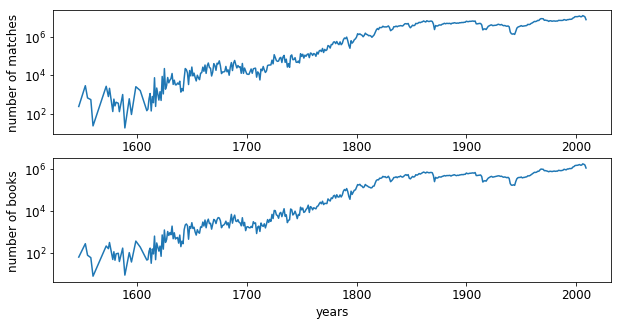

In [182]:
plt.figure( figsize=(10, 5) )
plt.subplot(2, 1, 1)
plt.semilogy( years, TotalMatchesPerYear )
plt.xlabel('years')
plt.ylabel('number of matches')

plt.subplot(2, 1, 2)
plt.semilogy( years, TotalVolumesPerYear )
plt.xlabel('years')
plt.ylabel('number of books')

## Match per year for one Ngram

In [203]:
def getCountPerYear( ngram, normed=False ):
    query = """ select year, match_count, volume_count  from ngram 
        where ngram is '%s' ORDER BY year ASC 
    """ % ngram
    
    cursor.execute( query )

    countByYears = cursor.fetchall()
    years, matchesPerYear, VolumesPerYear = zip( *countByYears )

    years, matchesPerYear = np.array(years), np.array(matchesPerYear)
    
    if normed:
        matchesPerYear = matchesPerYear / TotalMatchesPerYear
        
    return years, matchesPerYear

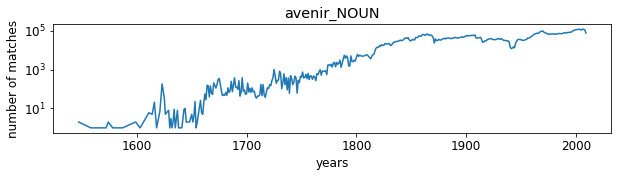

In [189]:
ngram = 'avenir_NOUN'

years, matchesPerYear = getCountPerYear( ngram )

plt.figure( figsize=(10, 2) )

plt.semilogy( years, matchesPerYear )
plt.xlabel('years')
plt.title(ngram);
plt.ylabel('number of matches');